<a href="https://colab.research.google.com/github/Delta9529/idz_internship/blob/main/IDZ_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data and lib

In [114]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/IDZ/IDZ Digital data analyst.csv")

In [117]:
data.columns = data.columns.str.strip()

In [118]:
data.columns

Index(['First Name', 'Last  Name', 'Gender', 'Age', 'Occupation', 'Salary',
       'Marital Status', 'No. of Children'],
      dtype='object')

In [119]:
data['First Name'] = data['First Name'].str.strip()
data['Last  Name'] = data['Last  Name'].str.strip()

# Data Description

In [120]:
data.shape #1000 rows 

(1000, 8)

In [121]:
data.columns # 8 columns

Index(['First Name', 'Last  Name', 'Gender', 'Age', 'Occupation', 'Salary',
       'Marital Status', 'No. of Children'],
      dtype='object')

In [122]:
data.nunique()

First Name         206
Last  Name         105
Gender               2
Age                 43
Occupation          53
Salary             957
Marital Status       2
No. of Children      6
dtype: int64

In [123]:
data.info() 
#Dtype object are qualitative columns 
#Dtype int are quantitative columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   First Name       1000 non-null   object
 1   Last  Name       1000 non-null   object
 2   Gender           1000 non-null   object
 3   Age              1000 non-null   int64 
 4   Occupation       1000 non-null   object
 5   Salary           1000 non-null   int64 
 6   Marital Status   1000 non-null   object
 7   No. of Children  1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [124]:
Counter(data.Gender),Counter(data['Marital Status']),Counter(data['Occupation']).most_common(5)

(Counter({'Female': 486, 'Male': 514}),
 Counter({'Married': 487, 'Single': 513}),
 [('Insurer', 29),
  ('Biochemist', 28),
  ('Driver', 24),
  ('Singer', 24),
  ('Programmer', 24)])

In [125]:
data.Occupation.value_counts(normalize = True).head() #relative frequencies of occupations 

Insurer       0.029
Biochemist    0.028
Driver        0.024
Programmer    0.024
Agronomist    0.024
Name: Occupation, dtype: float64

In [126]:
data.describe() #min max mean

,Age,Salary,No. of Children
count,1000.000000,1000.000000,1000.000000
mean,39.536000,5303.460000,2.447000
std,12.477275,2761.864336,1.703553
min,18.000000,520.000000,0.000000
25%,29.000000,2955.500000,1.000000
50%,40.000000,5228.000000,2.000000
75%,50.000000,7814.750000,4.000000
max,60.000000,10000.000000,5.000000


In [127]:
data[data.Salary == 10000] #highest paid job in the dataset

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
152,Myra,Grant,Female,47,Graphic Designer,10000,Married,2


In [128]:
data[data.Salary == min(data.Salary)] #least paid job in the dataset

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
308,Penelope,Henderson,Female,38,Singer,520,Single,5


In [129]:
Counter(data['First Name']).most_common(5) #most common names

[('Ryan', 13), ('Tara', 12), ('Frederick', 11), ('Arianna', 11), ('Edgar', 10)]

In [130]:
Counter(data['Last  Name']).most_common(5) #most common surnames

[('Thomas', 17),
 ('Watson', 16),
 ('Farrell', 15),
 ('Parker', 15),
 ('Kelly', 15)]

(array([268., 329., 403.]),
 array([15, 30, 45, 60]),
 <a list of 3 Patch objects>)

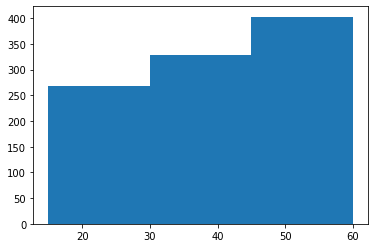

In [131]:
bin_list = [15,30,45,60]
plt.hist(data.Age, bins = bin_list) 

# dataset has more older people than younger people 

# Grouping Data

In [132]:
occupation_grouped = data.groupby(['Occupation']).mean()
martial_grouped = data.groupby(['Marital Status']).mean()
gender_grouped = data.groupby(['Gender']).mean()
occupation_grouped

,Age,Salary,No. of Children
Occupation,,,
Accountant,44.538462,6615.000000,2.769231
Actor,33.812500,4631.375000,2.187500
Aeroplane Pilot,38.750000,6691.166667,2.250000
Agronomist,37.166667,4860.291667,2.583333
Archeologist,43.650000,6117.300000,1.700000
Architect,37.181818,5569.863636,2.409091
Astronomer,32.888889,4632.944444,2.388889
Auditor,34.190476,5252.047619,1.666667
Baker,39.294118,4868.647059,3.058824


In [133]:
#Highest Paying Jobs
occupation_grouped.sort_values(by = ['Salary'],ascending=False).head()

,Age,Salary,No. of Children
Occupation,,,
Mechanic,35.250000,6884.500000,2.500000
Aeroplane Pilot,38.750000,6691.166667,2.250000
Accountant,44.538462,6615.000000,2.769231
Firefighter,38.466667,6578.600000,2.133333
Police Officer,36.000000,6554.866667,3.066667


In [134]:
# lowest paying jobs 
occupation_grouped.sort_values(by = ['Salary']).head()

,Age,Salary,No. of Children
Occupation,,,
Photographer,44.066667,3581.533333,2.400000
Cook,40.100000,3706.000000,1.900000
Florist,44.294118,3832.529412,2.705882
Jeweller,34.529412,4022.764706,1.764706
Manager,42.142857,4435.214286,1.857143


In [135]:
# Jobs with a older age group
occupation_grouped.sort_values(by = ['Age'],ascending=False).head()

,Age,Salary,No. of Children
Occupation,,,
Accountant,44.538462,6615.000000,2.769231
Mathematician,44.388889,4674.833333,2.444444
Florist,44.294118,3832.529412,2.705882
Photographer,44.066667,3581.533333,2.400000
Economist,44.052632,5748.842105,2.368421


In [136]:
#Jobs with a relatively younger age group
occupation_grouped.sort_values(by = ['Age']).head()

,Age,Salary,No. of Children
Occupation,,,
Astronomer,32.888889,4632.944444,2.388889
Actor,33.812500,4631.375000,2.187500
Auditor,34.190476,5252.047619,1.666667
Jeweller,34.529412,4022.764706,1.764706
Hairdresser,35.222222,4959.777778,2.777778


In [137]:
lawer_data = data[data.Occupation == 'Lawer']
acc_data = data[data.Occupation == 'Accountant']
photo_data = data[data.Occupation == 'Photographer']
singer_data = data[data.Occupation == 'Singer']

In [81]:
# here we ignore no of children

# in case of accountants the salary increases with time 
#(which we can suggest that the job depends more on seniority rather than skills/expertise as that in case of an lawer)
#similary for photographer & singer the skills matter than the age of the artist 
# in creative field age & salary do not have a correlation 

print('Lawer')
print(lawer_data.corr())
print()
print('\nAcc')
print(acc_data.corr())
print('\n\nPhotographer')
print(photo_data.corr())
print('\n\nSinger')
print(singer_data.corr())

Lawer
                      Age    Salary  No. of Children
Age              1.000000  0.113516        -0.164614
Salary           0.113516  1.000000        -0.232714
No. of Children -0.164614 -0.232714         1.000000


Acc
                      Age    Salary  No. of Children
Age              1.000000  0.418212        -0.075559
Salary           0.418212  1.000000        -0.599705
No. of Children -0.075559 -0.599705         1.000000


Photographer
                      Age    Salary  No. of Children
Age              1.000000 -0.284305        -0.331586
Salary          -0.284305  1.000000        -0.298547
No. of Children -0.331586 -0.298547         1.000000


Singer
                      Age    Salary  No. of Children
Age              1.000000 -0.570357        -0.155799
Salary          -0.570357  1.000000        -0.067842
No. of Children -0.155799 -0.067842         1.000000


In [113]:
gender_grouped

,Age,Salary,No. of Children
Gender,,,
Female,38.860082,5225.781893,2.436214
Male,40.175097,5376.906615,2.457198


In [82]:
martial_grouped 
# as we see here single people have more children on an average 
#this might be due to faulty data  
# does the single also mean divorced ? widowed? 

,Age,Salary,No. of Children
Marital Status,,,
Married,39.794661,5233.088296,2.412731
Single,39.290448,5370.265107,2.479532


In [83]:
data[data['Marital Status']=='Single']

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
2,Charlie,Wilson,Male,58,Aeroplane Pilot,5786,Single,0
5,Lucas,Brooks,Male,38,Auditor,3029,Single,1
10,Alina,Russell,Female,51,Engineer,8411,Single,0
11,Tiana,Wright,Female,59,Composer,8087,Single,4
12,Kimberly,Rogers,Female,54,Geologist,7929,Single,2
...,...,...,...,...,...,...,...,...
992,Sophia,Ferguson,Female,48,Architect,9636,Single,5
993,Fenton,Stewart,Male,53,Programmer,1777,Single,5
995,Alina,Cameron,Female,38,Florist,1432,Single,4
998,Rosie,Douglas,Female,21,Hairdresser,5982,Single,5


In [110]:
male_data[male_data.Salary == max(male_data.Salary)]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
969,Reid,Scott,Male,49,Meteorologist,9999,Single,5


In [111]:
male_data[male_data.Salary == min(male_data.Salary)]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
155,Aston,Ellis,Male,53,Historian,521,Single,4


In [105]:
female_data[female_data.Salary == max(female_data.Salary)]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
152,Myra,Grant,Female,47,Graphic Designer,10000,Married,2


In [112]:
female_data[female_data.Salary == min(female_data.Salary)]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
308,Penelope,Henderson,Female,38,Singer,520,Single,5
